In [1]:
!which jupyter
%matplotlib notebook

//anaconda/envs/egpu/bin/jupyter


In [22]:
import numpy as np
np.random.seed(1337) # for reproducibility
import random
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
import matplotlib.pyplot as plt
from keras import backend as K
from tqdm import tqdm

nb_classes = 10
 
def swish(x):
    return x * K.sigmoid(x)

# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()
 
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
 
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)
 
model = Sequential()
model.add(Dense(5000, input_shape=(784,)))
model.add(Activation("tanh"))
model.add(Dense(5000))
model.add(Activation("tanh"))
model.add(Dense(10))
model.add(Activation("tanh"))
 
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

60000 train samples
10000 test samples


In [23]:
initial_weights = []
for layer in model.layers:
  initial_weights.append(layer.get_weights())
 
var = 1
Z = []
for k in range(3):
  random_weights = []
  for layer in model.layers:
    weights_layer = layer.get_weights()
    new_weights = []
    for weight in weights_layer:
      new_weights.append(var*np.random.normal(size = weight.shape))
    random_weights.append(new_weights)
 
  scores_y = []
  t_ranges = np.linspace(-1,1, num = 20)
  j_ranges = np.linspace(-1,1, num = 20)
  for alpha in tqdm(j_ranges):
    scores_x = []
    for beta in t_ranges:
        for i, layer in enumerate(model.layers):
          new_weights = []
          for j, weight in enumerate(initial_weights[i]):
            new_weights.append(weight + beta*random_weights[i][j] +  alpha*random_weights[i][j])
          layer.set_weights(new_weights)
 
        scores_x.append(model.evaluate(X_test, Y_test, verbose=0)[0])
    scores_y.append(scores_x)
  Z.append(scores_y)


100%|██████████| 20/20 [09:50<00:00, 29.50s/it]


<IPython.core.display.Javascript object>


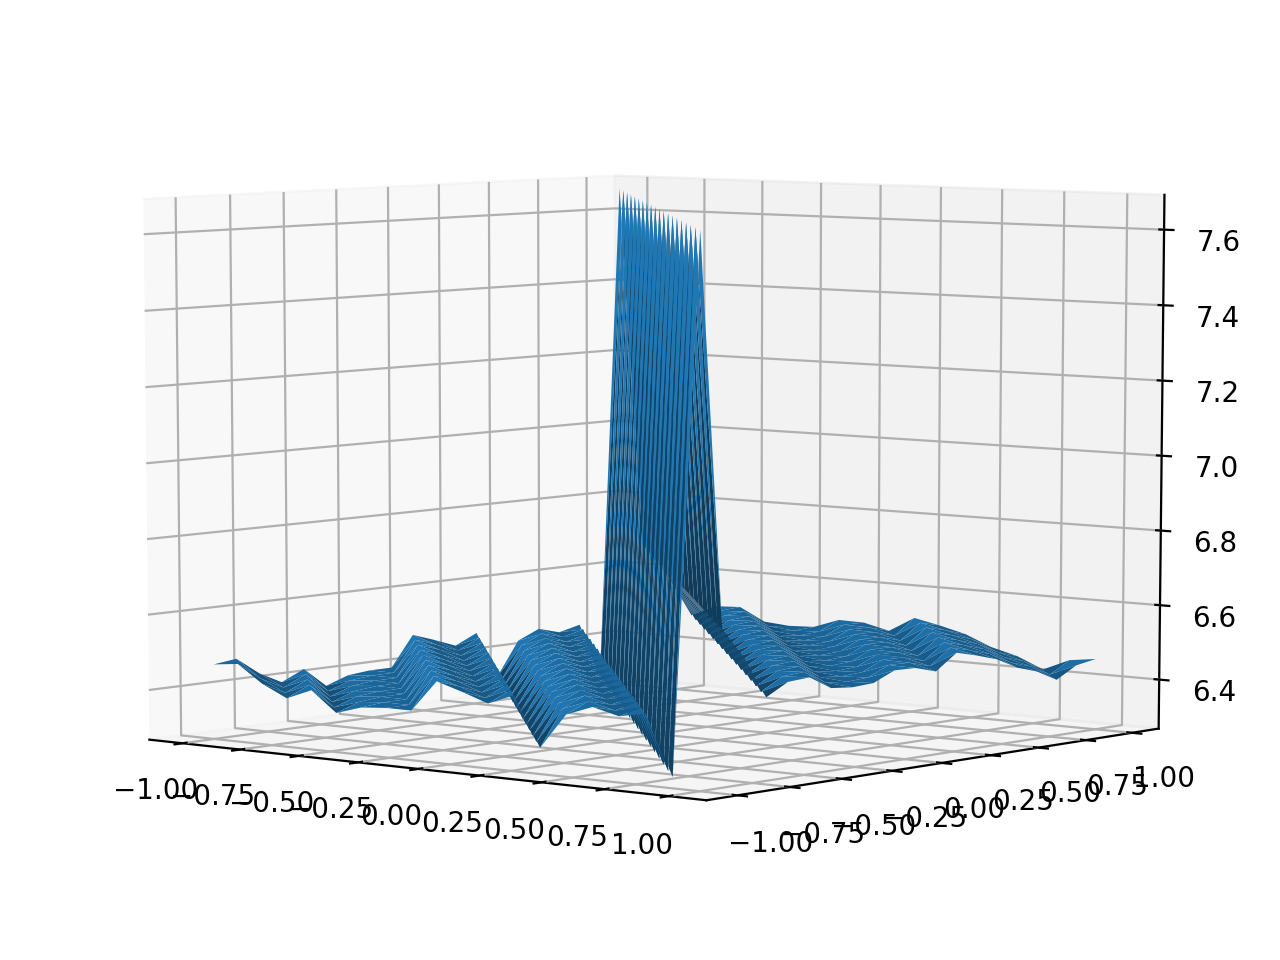

In [26]:
from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 
fig = plt.figure()
ax = Axes3D(fig)
X,Y = np.meshgrid(j_ranges,t_ranges)
cset = ax.plot_surface(X,Y, np.array(Z[2]))
ax.clabel(cset, fontsize=9, inline=1)
plt.show()

In [10]:
scores

[14.088577471923829,
 14.082683056640626,
 14.069608023071289,
 14.081278048706055,
 14.037203829956054,
 13.992883886718751,
 14.000998391723632,
 13.96100537109375,
 13.967594366455078,
 13.949188681030273,
 13.970730899047851,
 13.96602019958496,
 13.942043353271485,
 13.901826918029785,
 13.929828771972657,
 13.924805731201172,
 13.893096649169921,
 13.900057821655274,
 13.904902352905273,
 13.903465853881835,
 13.872274172973633,
 13.842759709167481,
 13.864354394531251,
 13.823675871276855,
 13.795517817687989,
 13.822270202636719,
 13.789036645507812,
 13.78324801940918,
 13.792452729797363,
 13.743288641357422,
 13.706627542114258,
 13.712600125122071,
 13.72675309753418,
 13.698944789123535,
 13.683775686645507,
 13.661961050415039,
 13.702545233154297,
 13.722312127685546,
 13.717194905090333,
 13.74575637512207,
 13.750402926635742,
 13.772753929138183,
 13.797991320800781,
 13.73523578491211,
 13.65470729522705,
 13.645697343444825,
 13.651262344360351,
 13.623499450683594,